# Trabalho de Frameworks de IA

#### Estudante: Clístenes Grizafis Bento
#### Professor: Razer Anthom Nizer Rojas Montaño

### Equipes de no máximo 6 integrantes. 

Resolver e entregar os exercícios vistos em sala para as técnicas abordadas, usando o **Google Colab com TensorFlow**. 


### <font color=red> Entregar No Moodle (todos os itens abaixo)
  1.	O arquivo baixado do Colab com os resultados: Arquivos .ipynb
  2.	Arquivo com o(s) link(s) do seu exercício no Colab compartilhado
  3.	Compartilhar o Colab por Link, não esquecer de dar permissão para "Todos", para que o professor possa acessar o seu compartilhamento


## **LINK do Colab:** https://colab.research.google.com/drive/1sbOXGH80q2R7sZ_X2zplBMD4BZrCBsoQ?usp=sharing

## Os trabalhos são os vistos em sala, a saber:

#### Setup inicial

In [ ]:
! pip install --upgrade pip

In [ ]:
! pip install tensorflow==2.12.*

Importação de bibliotecas comuns

In [2]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, LSTM, Conv2D, Dropout, SimpleRNN, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

random.seed(5941) # Semente pseudo aleatória

### 1)	**Seção 02 - API Básica e RNA - Câncer de Mama:** Redes Neurais Básico

Importação das Bibliotecas e Carga do Modelo

In [136]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()

Separação da Base e Pré-processamento

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#separação da base
X_train, X_test, Y_train, Y_test =train_test_split(data_cancer.data,data_cancer.target,test_size=0.33)
N, D = X_train.shape

#pré-processamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Criação do Modelo

In [138]:
i = tf.keras.layers.Input(shape=(D,))
x = tf.keras.layers.Dense(1, activation="sigmoid")(i)
model = tf.keras.models.Model(i, x)

Compilação e Treino do Modelo

In [139]:
#compilação
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
#treino
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 0.6629 - accuracy: 0.6430 - val_loss: 0.6413 - val_accuracy: 0.6862
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6121 - accuracy: 0.6798 - val_loss: 0.5912 - val_accuracy: 0.7394
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5669 - accuracy: 0.7244 - val_loss: 0.5477 - val_accuracy: 0.7660
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5272 - accuracy: 0.7480 - val_loss: 0.5098 - val_accuracy: 0.7979
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4932 - accuracy: 0.7769 - val_loss: 0.4754 - val_accuracy: 0.8298
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4626 - accuracy: 0.8110 - val_loss: 0.4455 - val_accuracy: 0.8351
Epoch 7/100
12/12 [==============================] - 0s 11ms/step - loss: 0.4363 - accuracy: 0.8215 - val_loss: 0.4189 - val_accuracy: 0.8457
Epoch 8/10

Avaliação do Modelo

In [140]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9764
Train score:  [0.10040085017681122, 0.9763779640197754]
6/6 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9840
Test score:  [0.0730440691113472, 0.9840425252914429]


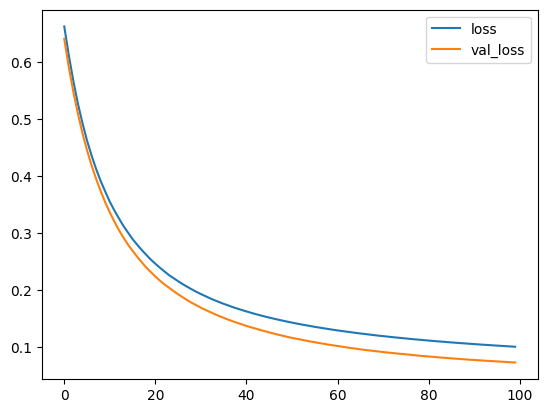

In [141]:
#gráfico descida de gradiente
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

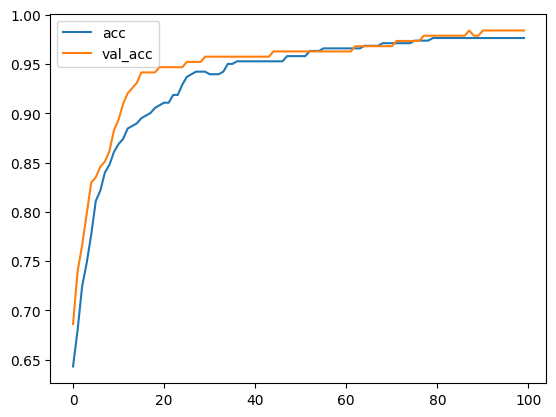

In [142]:
#Gráfico de acurácia
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Predições e Resultados

6/6 [==============================] - 0s 3ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

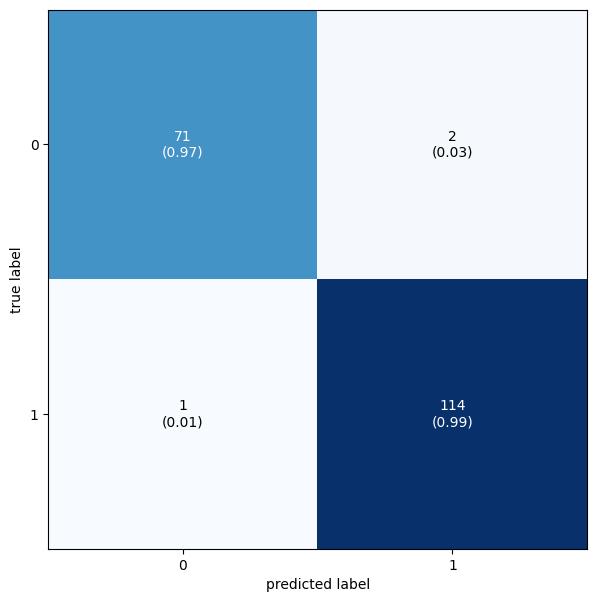

In [143]:
#predição
pred = model.predict(X_test)
pred = np.round(pred).flatten()

#matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

In [144]:
#acurácia
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test))
print("")
print("Acurácia: ", model.evaluate(X_test, Y_test)[1])

Acurácia na mão:  0.9840425531914894
6/6 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9840
Evaluate:  [0.0730440691113472, 0.9840425252914429]

6/6 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.9840
Acurácia:  0.9840425252914429


### 2)	**Seção 02 - API Básica e RNA - MNIST:** RReconhecimento de dígitos

Importação das Bibliotecas e Carga do Modelo

In [145]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Separação da Base e Pré-processamento

In [146]:
x_train, x_test = x_train/255.0, x_test/255.0

Criação do Modelo

In [147]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.models.Model(i, x)

Compilação e Treino do Modelo

In [148]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
r = model.fit(x_train,
y_train,
validation_data=(x_test, y_test),
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2953 - accuracy: 0.9143 - val_loss: 0.1398 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1438 - accuracy: 0.9574 - val_loss: 0.1038 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1084 - accuracy: 0.9676 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0827 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0706 - val_accuracy: 0.9791
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.0717 - val_accuracy:

Avaliação do Modelo

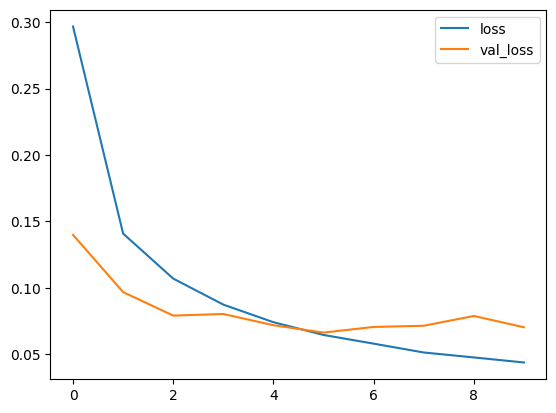

In [10]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

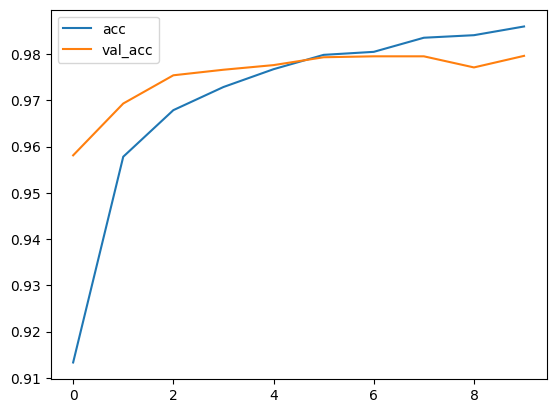

In [11]:
# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [12]:
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9796
[0.07032740861177444, 0.9796000123023987]


Predições e Resultados

313/313 [==============================] - 0s 1ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

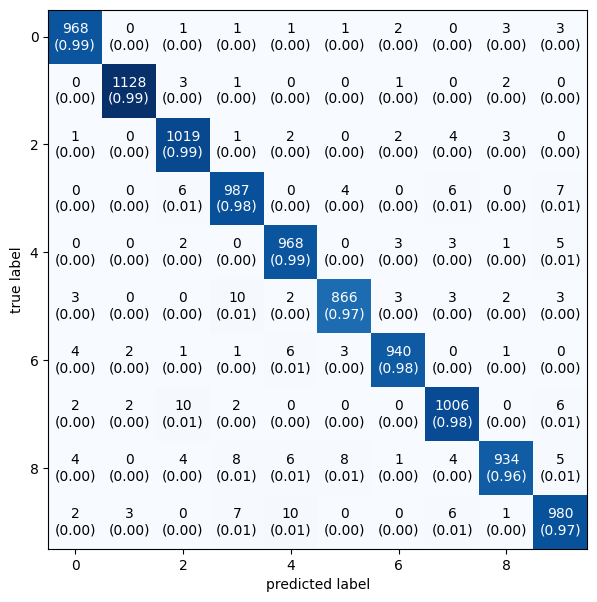

In [14]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

### 3)	**Seção 02 - API Básica e RNA - Biomassa:** Predição de Biomassa

Importação das Bibliotecas, funções e Carga do Modelo

In [ ]:
from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )
def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

!wget http://www.razer.net.br/datasets/Biomassa_REG.csv
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=
",").values
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

Separação da Base e Pré-processamento

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
test_size=0.33)
dap_train = x_train[:,0]
h_train = x_train[:,1]
dap_test = x_test[:,0]
h_test = x_test[:,1]

Criação do Modelo

In [22]:
i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

Compilação e Treino do Modelo

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,
loss="mse",
metrics=[rmse, r2])

early_stop = tf.keras.callbacks.EarlyStopping(
monitor='val_loss',
patience=20,
restore_best_weights=True)
r = model.fit(x_train, y_train,
epochs=1500,
validation_data=(x_test, y_test),
callbacks=[early_stop])

Avaliação do Modelo

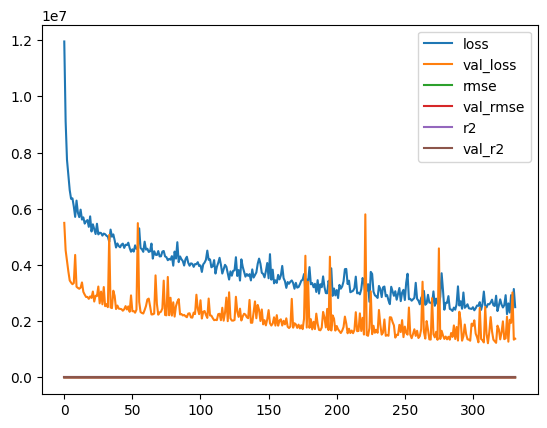

In [25]:
plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()
plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

Predições e Resultados

In [26]:
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

42/42 [==============================] - 0s 2ms/step
mse =  1218677.9839233763
rmse =  1103.937490949273
r2 =  0.8931881976614925


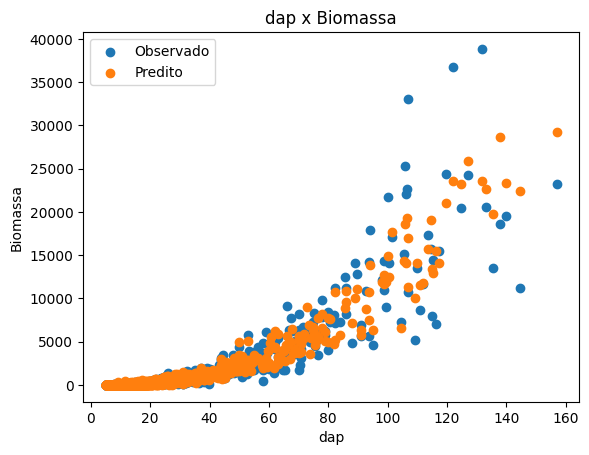

In [27]:
plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()

### 4)	**Seção 03 - CNN - Fashion MNIST:** Classificação de imagens

Importação das Bibliotecas e Carga do Modelo

In [28]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Carga dos dados
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Separação da Base e Pré-processamento

In [29]:
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
# Adicionar uma dimensão:
# N x H x W -> N x H x W x C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


Criação do Modelo

In [30]:
# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

Compilação e Treino do Modelo

In [31]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5256 - accuracy: 0.8058 - val_loss: 0.4063 - val_accuracy: 0.8461
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3659 - accuracy: 0.8627 - val_loss: 0.3488 - val_accuracy: 0.8693
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3161 - accuracy: 0.8825 - val_loss: 0.3377 - val_accuracy: 0.8762
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2819 - accuracy: 0.8941 - val_loss: 0.3126 - val_accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2556 - accuracy: 0.9035 - val_loss: 0.3097 - val_accuracy: 0.8916
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2325 - accuracy: 0.9111 - val_loss: 0.3080 - val_accuracy: 0.8917
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2139 - accuracy: 0.9182 - val_loss: 0.3042 - val_accu

Avaliação do Modelo


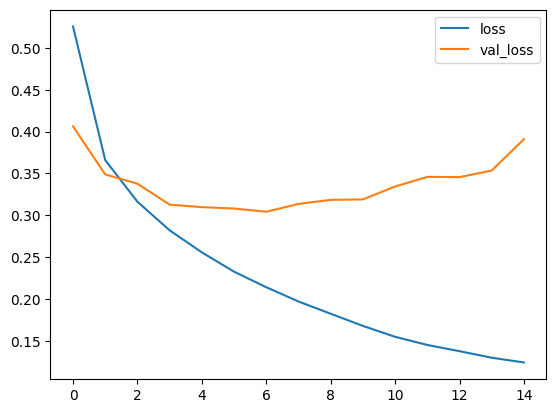

In [32]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

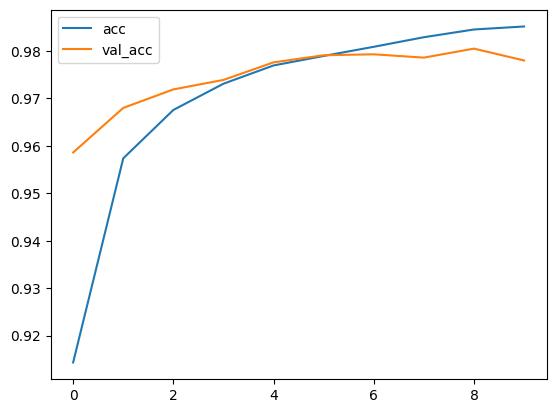

In [149]:
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Predições e Resultados

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

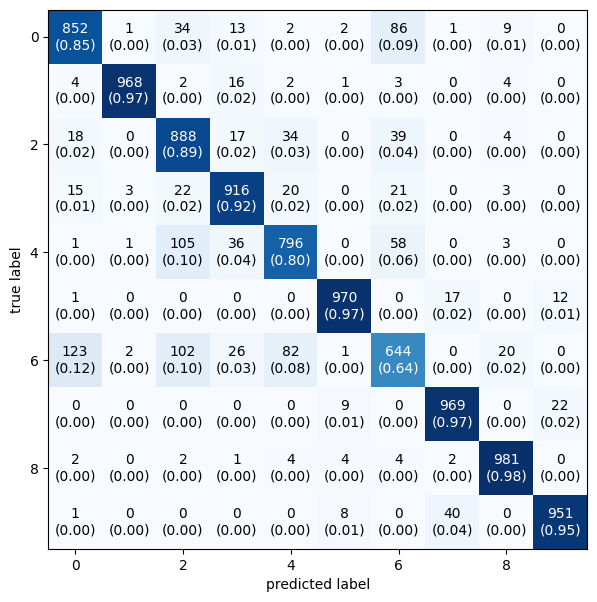

In [33]:
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

### 5)	**Seção 03 - CNN - CIFAR 10:** Classificação de imagens

Importação das Bibliotecas e Carga do Modelo

In [34]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Separação da Base e Pré-processamento


In [35]:
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


Criação do Modelo

In [36]:
# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

Compilação e Treino do Modelo

In [37]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5715 - accuracy: 0.4240 - val_loss: 1.2679 - val_accuracy: 0.5361
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2804 - accuracy: 0.5367 - val_loss: 1.1363 - val_accuracy: 0.5894
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1488 - accuracy: 0.5865 - val_loss: 1.0256 - val_accuracy: 0.6398
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0481 - accuracy: 0.6249 - val_loss: 0.9919 - val_accuracy: 0.6475
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9746 - accuracy: 0.6548 - val_loss: 0.9306 - val_accuracy: 0.6767
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9127 - accuracy: 0.6738 - val_loss: 0.8942 - val_accuracy: 0.6862
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8557 - accuracy: 0.6939 - val_loss: 0.8761 - val_accur

Avaliação do Modelo


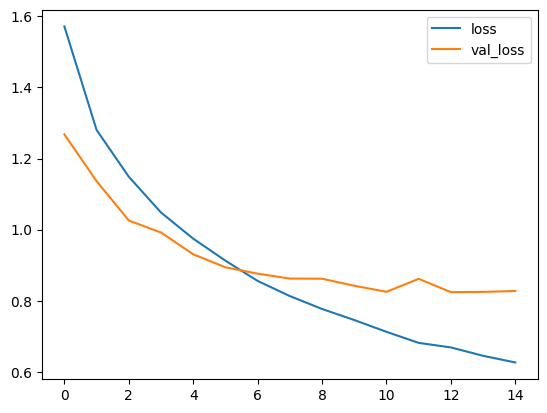

In [38]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

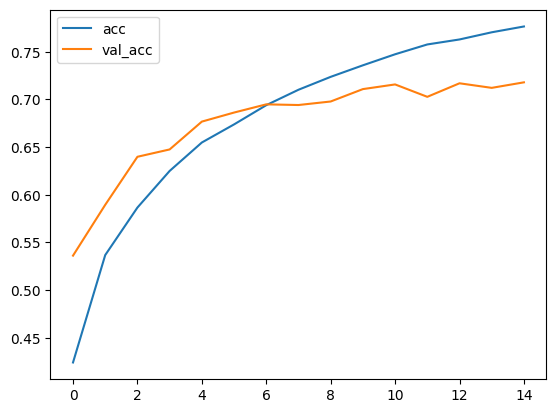

In [39]:
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Predições e Resultados

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

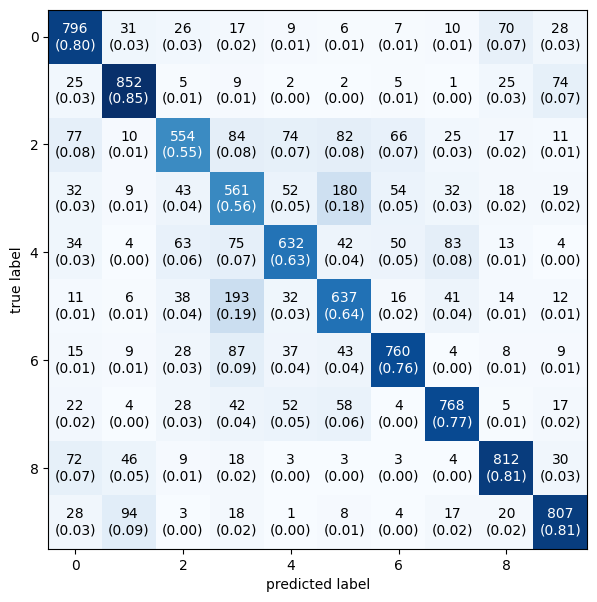

In [40]:
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

### 6)	**Seção 04 - RNN e Classificação de Textos - Senoidal :** Predição de Série Temporal

Importação das Bibliotecas e Carga do Modelo

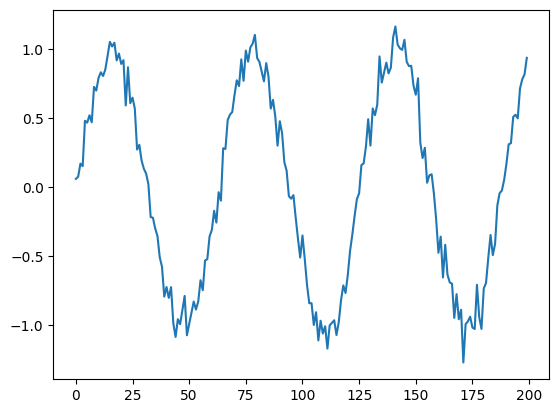

In [41]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

Separação da Base e Pré-processamento

In [43]:
T = 10 # tamanho da janela
D = 1 # quantidade de dados
X = [] 
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


Criação do Modelo

In [44]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)

Compilação e ajuste do Modelo

In [45]:
model.compile(
loss="mse",
optimizer=Adam(lr=0.1)
)

In [ ]:
r = model.fit(
X[:-N//2], Y[:-N//2],
epochs=80,
validation_data=(X[-N//2:], Y[-N//2:])
)

Avaliação do Modelo

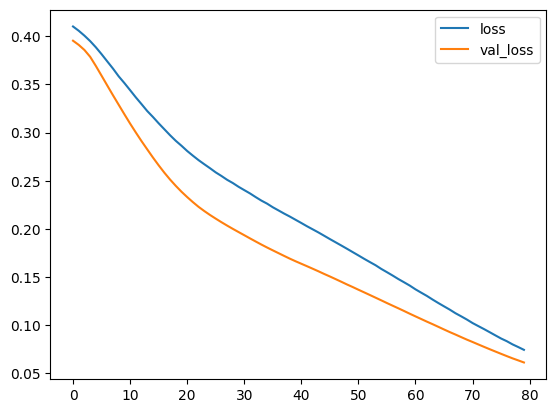

In [47]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

Predições e Resultados

In [ ]:
# Predições : 1-step
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)

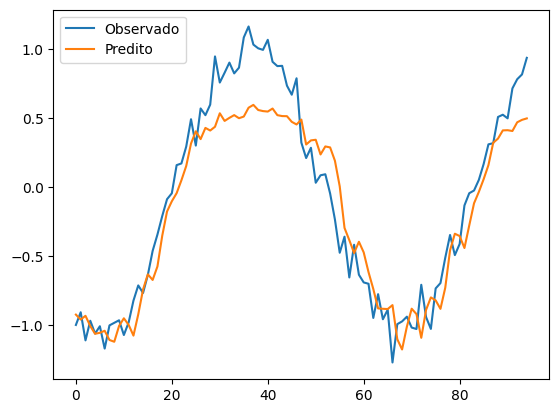

In [50]:
#  Plotar Observado x Predito
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

### 7)	**Seção 04 - RNN e Classificação de Textos - Passageiros:** Predição de Série Temporal

Importação das Bibliotecas e Carga do Modelo

--2023-05-01 20:02:42--  http://www.razer.net.br/datasets/airline-passengers.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/csv]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-01 20:02:42 (215 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



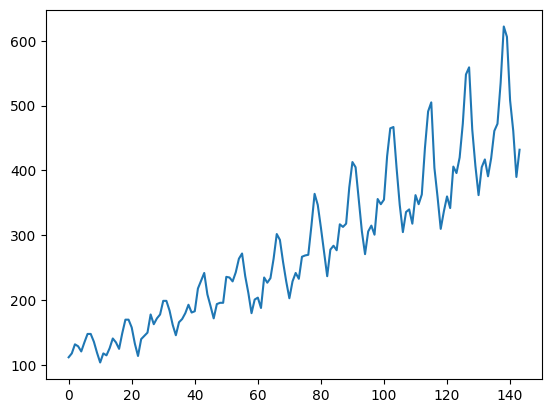

In [53]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

!wget http://www.razer.net.br/datasets/airline-passengers.csv
df = pd.read_csv("airline-passengers.csv", usecols=[1])
df.head()
plt.plot(df)
plt.show()

Separação da Base e Pré-processamento

In [55]:
series = df.values
series = series.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)
# tamanho da base de treino – 67% do total
train_size = int(len(series) * 0.67)

T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (134, 10, 1)  Y.shape:  (134, 1)


Criação do Modelo

In [56]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
# x = SimpleRNN(5, activation="relu")(i)
# x = SimpleRNN(5)(i) # tanh por default
x = Dense(1)(x)
model = Model(i, x)

Compilação e ajuste do Modelo

In [57]:
model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)

In [ ]:
r = model.fit(
X[:train_size], Y[:train_size],
epochs=80,
validation_data=(X[-train_size:], Y[-train_size:])
)

Avaliação do Modelo

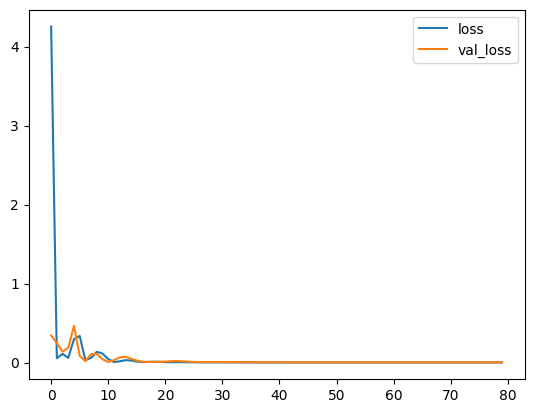

In [59]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

Predições e Resultados

1/1 [==============================] - 0s 27ms/step


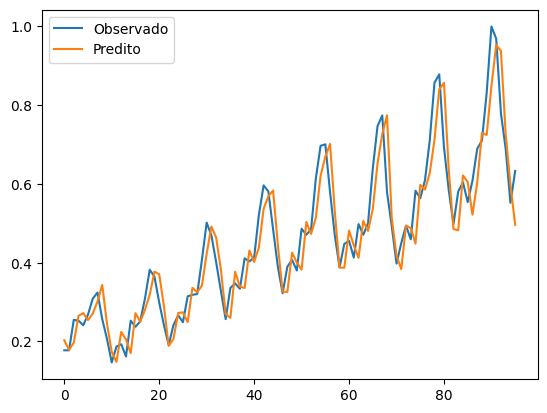

In [60]:
# 1-Step
validation_target = Y[-train_size:]
validation_predictions = []
i = -train_size
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

1/1 [==============================] - 0s 22ms/step


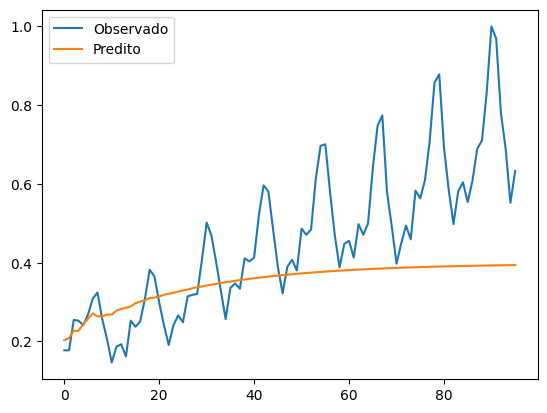

In [61]:
# Multi-Step
validation_target = Y[-train_size:]
validation_predictions = []
last_x = X[-train_size]
while len(validation_predictions) < len(validation_target):
  p = model.predict( last_x.reshape(1, -1, 1))[0, 0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

### 8)	**Seção 04 - RNN e Classificação de Textos - IMDB  :** Classificação de reviews

Importação das Bibliotecas e Carga do Modelo

In [62]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

num_words = 20000 # número de palavras
maxlen = 200 # máximo palavras no review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


Separação da Base e Pré-processamento

In [63]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Criação do Modelo

In [64]:
# Construir a RNN
# recebe como entrada maxlen palavras
i = Input(shape=(x_train.shape[1], ))
# com textos precisa da camada de
# - representação numérica das palavras
# num_words palavras e 128 características para representar
# cada palavra (colunas)
# Não tem relação com a quantidade de unidades da LSTM
x = Embedding(input_dim=num_words, output_dim=128)(i)
x = LSTM(units=128, activation="tanh")(x)
x = Dense(units=1, activation="sigmoid")(x)
model = Model(i, x)

Compilação e Treino do Modelo

In [65]:
# para RNN melhor rmsprop
model.compile(optimizer="rmsprop", loss="binary_crossentropy",
metrics=["accuracy"])

epochs = 10
r = model.fit(x_train, y_train, epochs=epochs, batch_size=128)



Epoch 1/10
196/196 [==============================] - 31s 141ms/step - loss: 0.5543 - accuracy: 0.7010
Epoch 2/10
196/196 [==============================] - 18s 91ms/step - loss: 0.3500 - accuracy: 0.8540
Epoch 3/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2830 - accuracy: 0.8887
Epoch 4/10
196/196 [==============================] - 10s 51ms/step - loss: 0.2341 - accuracy: 0.9109
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2086 - accuracy: 0.9221
Epoch 6/10
196/196 [==============================] - 7s 35ms/step - loss: 0.1773 - accuracy: 0.9342
Epoch 7/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1555 - accuracy: 0.9457
Epoch 8/10
196/196 [==============================] - 6s 29ms/step - loss: 0.1338 - accuracy: 0.9529
Epoch 9/10
196/196 [==============================] - 5s 23ms/step - loss: 0.1147 - accuracy: 0.9604
Epoch 10/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1006 - a

Avaliação do Modelo

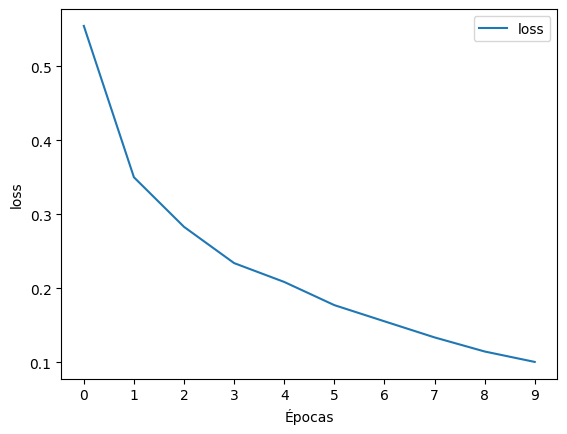

In [69]:
# função de perda
plt.plot( r.history["loss"], label="loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

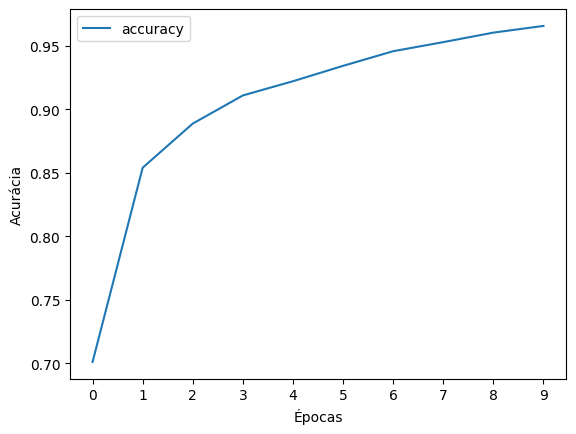

In [70]:
# acurácia
plt.plot( r.history["accuracy"], label="accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [71]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

782/782 [==============================] - 7s 8ms/step - loss: 0.3940 - accuracy: 0.8543
0.8542799949645996


Predições e Resultados

In [72]:
texto = [[4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766]]
entrada = pad_sequences(texto, 200)
sent = np.round(model.predict(entrada))
print( "Positivo" if sent==1 else "Negativo" )

1/1 [==============================] - 1s 642ms/step
Negativo


### 9)	**Seção 04 - RNN e Classificação de Textos - SPAM  :** Classificação de e-mails

Importação das Bibliotecas e Carga do Modelo

In [73]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer 

!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam" : 1})
y = df["b_labels"].values

--2023-05-01 20:21:24--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2023-05-01 20:21:24 (13.2 MB/s) - ‘spam.csv’ saved [503663/503663]



Separação da Base e Pré-processamento

In [74]:
# separação
x_train, x_test, y_train, y_test = train_test_split(df["data"],
y, test_size=0.33)

# tokenização
# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são 
# ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

# padding
data_train = pad_sequences(sequences_train)
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

7247 tokens
data_train.shape:  (3733, 121)
data_test.shape:  (1839, 121)


Criação do Modelo

In [75]:
D = 20 # tamanho do embedding, hiperparâmetro que pode ser escolhido
M = 15 # tamanho do hidden state
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
# x = LSTM(M)(x) # tirar o GlobalMaxPooling1D()
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

Compilação e Treino do Modelo

In [76]:
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)

In [77]:
epochs = 10
r = model.fit(
data_train,
y_train,
epochs=epochs,
validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 28s 207ms/step - loss: 0.4607 - accuracy: 0.8626 - val_loss: 0.3795 - val_accuracy: 0.8722
Epoch 2/10
117/117 [==============================] - 10s 89ms/step - loss: 0.3685 - accuracy: 0.8628 - val_loss: 0.3115 - val_accuracy: 0.8722
Epoch 3/10
117/117 [==============================] - 3s 27ms/step - loss: 0.2948 - accuracy: 0.8628 - val_loss: 0.2586 - val_accuracy: 0.8722
Epoch 4/10
117/117 [==============================] - 3s 26ms/step - loss: 0.2036 - accuracy: 0.9020 - val_loss: 0.1652 - val_accuracy: 0.9657
Epoch 5/10
117/117 [==============================] - 3s 29ms/step - loss: 0.1151 - accuracy: 0.9858 - val_loss: 0.1085 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 5s 42ms/step - loss: 0.0682 - accuracy: 0.9917 - val_loss: 0.0861 - val_accuracy: 0.9810
Epoch 7/10
117/117 [==============================] - 3s 27ms/step - loss: 0.0460 - accuracy: 0.9938 - val_loss: 0.0770 - val_accuracy: 0.9

Avaliação do Modelo

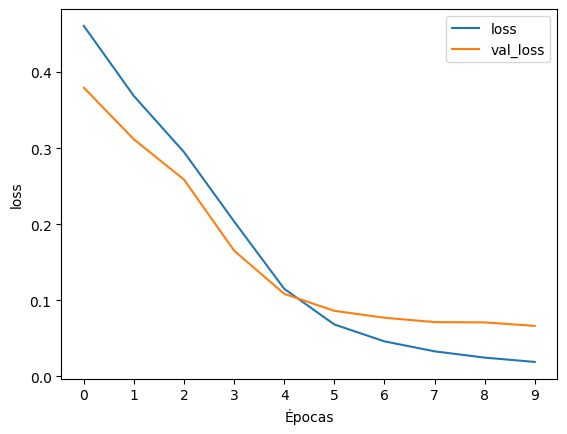

In [78]:
# função de perda
plt.plot( r.history["loss"], label="loss")
plt.plot( r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

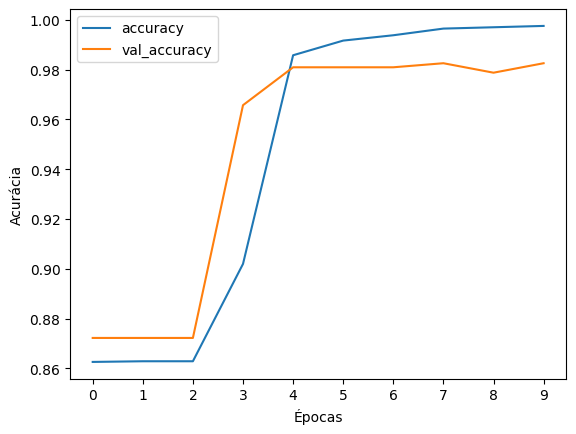

In [79]:
# acurácia
plt.plot( r.history["accuracy"], label="accuracy")
plt.plot( r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

Predições e Resultados


In [80]:
texto = "Before I introduce myself the mouse runs on the road"
seq_texto = tokenizer.texts_to_sequences([texto])
data_texto = pad_sequences(seq_texto, maxlen=T)
pred = model.predict(data_texto)
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 [==============================] - 0s 330ms/step
[[0.00638141]]
OK


### 10)	**Seção 04 - RNN e Classificação de Textos - Shakespeare:** Geração de texto

Importação das Bibliotecas e Carga do Modelo

In [82]:
import os
import time

path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
# Leitura do texto
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# Tamanho do texto em número de caracteres
print(f'Tamanho do texto: {len(text)} caracteres')
# Primeiros 250 caracteres do texto
print(text[:250])
# Caracteres únicos
vocab = sorted(set(text))
print(f'{len(vocab)} caracters únicos')

1115394/1115394 [==============================] - 0s 0us/step
Tamanho do texto: 1115394 caracteres
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

65 caracters únicos


Separação da Base e Pré-processamento

In [83]:
# Converte um caractere em um ID único
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)
# Faz o contrário, converte os IDs em caracteres
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
# Função onde, dado uma lista de IDs, gera o texto
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

# Gerar base de treino
# Exemplo : Para a palagra "Hello" 
# Suponha seq_length = 4
# Então: Entrada "Hell" e Saída "ello"
# Tem que dividir o texto em pedaços de tamanho seq_length+1
# from_tensor_slices - cria um dataset com os dados
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)
# Converte as sequências no tamanho desejado : seq_length+1
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

# Função onde, dado uma sequência "Hello", gera entrada e saída: "Hell" e "ello"
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text
# dataset contém as sequências contendo entrada e saída
dataset = sequences.map(split_input_target)
# Criar lotes de treinamento
# Batch size
BATCH_SIZE = 64
# Tamanho do buffer para randomizar o dataset
BUFFER_SIZE = 10000
dataset = (
  dataset
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE, drop_remainder=True)
  .prefetch(tf.data.experimental.AUTOTUNE))

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


Criação do Modelo

In [84]:
# Construir o modelo
# Tamanho do vocabulário em número de caracteres
vocab_size = len(vocab)
# Dimensão do Embedding
embedding_dim = 256
# Número de unidades RNN
rnn_units = 1024

In [85]:
# Classe que gera o modelo: Embedding -> GRU -> Dense
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU( rnn_units,
                                    return_sequences=True,
                                    return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)
  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)
    if return_state:
      return x, states
    else:
      return x

In [86]:
# Criação do modelo
model = MyModel(
        # Be sure the vocabulary size matches the `StringLookup` layers.
        vocab_size=len(ids_from_chars.get_vocabulary()),
        embedding_dim=embedding_dim,
        rnn_units=rnn_units)

Compilação e Treino do Modelo

In [87]:
# Função de perda é sparse_categorical_crossentropy
# Modelo retorna Logits, sinaliza from_logits
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compila o modelo
model.compile(optimizer='adam', loss=loss)
# Treinar
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/20
172/172 [==============================] - 16s 66ms/step - loss: 2.7412
Epoch 2/20
172/172 [==============================] - 12s 61ms/step - loss: 1.9955
Epoch 3/20
172/172 [==============================] - 12s 61ms/step - loss: 1.7159
Epoch 4/20
172/172 [==============================] - 12s 61ms/step - loss: 1.5536
Epoch 5/20
172/172 [==============================] - 14s 63ms/step - loss: 1.4551
Epoch 6/20
172/172 [==============================] - 13s 61ms/step - loss: 1.3853
Epoch 7/20
172/172 [==============================] - 13s 60ms/step - loss: 1.3333
Epoch 8/20
172/172 [==============================] - 12s 61ms/step - loss: 1.2885
Epoch 9/20
172/172 [==============================] - 13s 61ms/step - loss: 1.2468
Epoch 10/20
172/172 [==============================] - 13s 61ms/step - loss: 1.2074
Epoch 11/20
172/172 [==============================] - 12s 61ms/step - loss: 1.1685
Epoch 12/20
172/172 [==============================] - 15s 61ms/step - loss: 1.1272
E

Resultados

one-step

In [94]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [95]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

# Executar em um laço para gera o texto
start = time.time()
states = None
next_char = tf.constant(['ROMEO:']) 
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states) 
  result.append(next_char)

result = tf.strings.join(result)
end = time.time() 

print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80) 
print('\nRun time:', end - start)

ROMEO:
Thus will, were her mercy we charge your own.

EDWARD:
Swift it! Dost thou urtis for me?
Adone the Lord Angelo so, be not
and endred every one are o'er essemest home for ours!
Therefore, if ambutious lord.

CAMILLO:
No.

MARCIUS:
See how the
loys of hander, brothers bled in Greece; here shows me
The dager which no respect and sleep;
And all the English quarrelly is blood
To bring me more a threw black and place!
Do, too out of barren fortune stoop
To save my lesser than the breath of gentle strong:
Now, good night! for I must die,
It should be drunken married, made it off along,
Unless the thoughts of By herbs,--would they scatch, my lady,
If I may surplish two beginners of triumphant:
O good sweet princess, such a mass and flies,
Terrible his virtue of his ancient,
I chared to me again away and full of wretch
Untamed lingers' present vex'd Pity.

LUCIO:
Sir, the rightness.

PROSPERO:
Now I do beseech you mean.

MENENIUS:
Well, let her show offence.

ROMEO:
Alas, the more of tho

### 11)	**Seção 05 - Transfer Learning e Fine Tuning:** Reconhecer gatos e cachorros

Importação das Bibliotecas e Carga do Modelo

In [98]:
import os
import zipfile
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# plota os gráficos inline e salva no notebook
%matplotlib inline

!wget http://www.razer.net.br/datasets/cats_and_dogs_filtered.zip

# descompactar a base
dataset_path = "./cats_and_dogs_filtered.zip"
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")
zip_object.extractall("./")
zip_object.close()

--2023-05-01 20:51:30--  http://www.razer.net.br/datasets/cats_and_dogs_filtered.zip
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   215MB/s    in 0.3s    

2023-05-01 20:51:30 (215 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



Separação da Base e Pré-processamento

In [ ]:
# diretório de treino e teste
dataset_path_new = "./cats_and_dogs_filtered"
train_dir = os.path.join(dataset_path_new, "train")
test_dir = os.path.join(dataset_path_new, "validation")

# carregar modelo pré treinado
input_shape = (128, 128, 3) # tamanho da imagem entrada
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights="imagenet")
base_model.summary()

# Congelar modelo base
base_model.trainable = False

# Adicionar cabeçalho personalizado
print(base_model.output.shape)
# reduzir a dimensionalidade (4 x 4 x 1280 = 20480 pesos para treinar!!)
# Global Average Pooling
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
print(global_average_layer.shape)
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(
global_average_layer)

Criação do Modelo

In [101]:
# Definição do modelo (unir o base com o personalizado)
model = tf.keras.models.Model(base_model.input,
prediction_layer)
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_10[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

Compilação e Treino do Modelo

In [102]:
# compilar o modelo
# testar com o Adam também
model.compile(optimizer=tf.keras.optimizers.RMSprop(
learning_rate=0.0001),
loss="binary_crossentropy",
metrics = ["accuracy"])

In [104]:
# carga das imagens
# Pré-processamento /255
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)
train_generator = data_gen_train.flow_from_directory(train_dir, target_size = (128,128), batch_size = 128, class_mode = "binary")
test_generator = data_gen_train.flow_from_directory(test_dir, target_size = (128,128), batch_size = 128, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [105]:
# Treinar o modelo
EPOCHS = 5
r = model.fit(train_generator, epochs = EPOCHS, validation_data = test_generator)

Epoch 1/5
16/16 [==============================] - 16s 736ms/step - loss: 0.9033 - accuracy: 0.4115 - val_loss: 0.8028 - val_accuracy: 0.4900
Epoch 2/5
16/16 [==============================] - 12s 776ms/step - loss: 0.7657 - accuracy: 0.5260 - val_loss: 0.6965 - val_accuracy: 0.5840
Epoch 3/5
16/16 [==============================] - 17s 1s/step - loss: 0.6681 - accuracy: 0.6235 - val_loss: 0.6088 - val_accuracy: 0.6630
Epoch 4/5
16/16 [==============================] - 11s 701ms/step - loss: 0.5828 - accuracy: 0.6965 - val_loss: 0.5332 - val_accuracy: 0.7410
Epoch 5/5
16/16 [==============================] - 12s 759ms/step - loss: 0.5120 - accuracy: 0.7610 - val_loss: 0.4687 - val_accuracy: 0.8020


Avaliação do Modelo

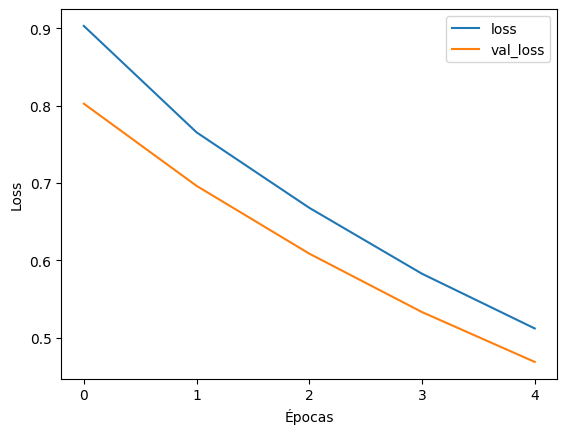

In [106]:
# função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

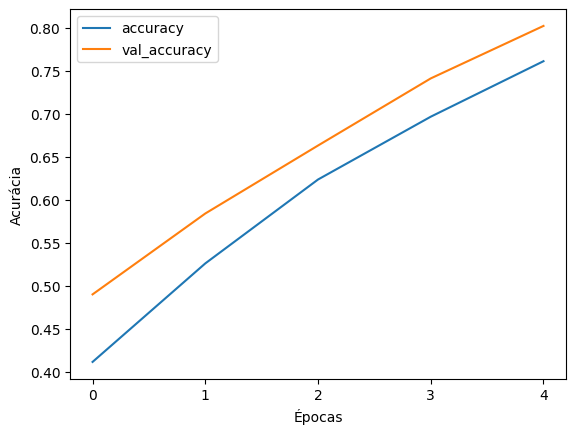

In [107]:
# acurácia
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

In [108]:
# Avaliação do Modelo
val_loss, val_accuracy = model.evaluate (test_generator)
print(val_accuracy)

8/8 [==============================] - 5s 581ms/step - loss: 0.4687 - accuracy: 0.8020
0.8019999861717224


Aplicar Fine Tuning

In [109]:
# Efetuar o Fine Tuning
# Primeiro fazer o Transfer Learning
# Depois o Fine Tuning
# descongelar algumas camadas
base_model.trainable = True
len(base_model.layers)
# deixar o início da base
# congelar o final
fine_tuning_at = 100
for l in base_model.layers[:fine_tuning_at]:
  l.trainable = False

Compilação e Treino do Modelo

In [110]:
#compilar o modelo
# testar com o Adam tb
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss = "binary_crossentropy", metrics = ["accuracy"])
# Treinar o modelo
EPOCHS = 5
r = model.fit(train_generator, epochs = EPOCHS, validation_data = test_generator)

Epoch 1/5
16/16 [==============================] - 32s 1s/step - loss: 0.2178 - accuracy: 0.9100 - val_loss: 0.0989 - val_accuracy: 0.9610
Epoch 2/5
16/16 [==============================] - 17s 1s/step - loss: 0.0384 - accuracy: 0.9955 - val_loss: 0.1223 - val_accuracy: 0.9540
Epoch 3/5
16/16 [==============================] - 9s 599ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 4/5
16/16 [==============================] - 9s 603ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9630
Epoch 5/5
16/16 [==============================] - 17s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.1810 - val_accuracy: 0.9540


avaliação de evolução

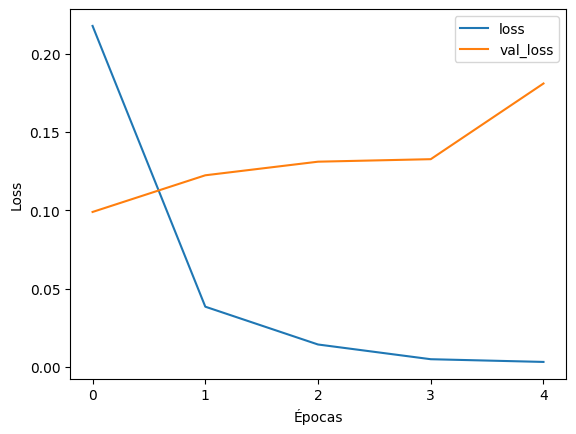

In [111]:
# função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

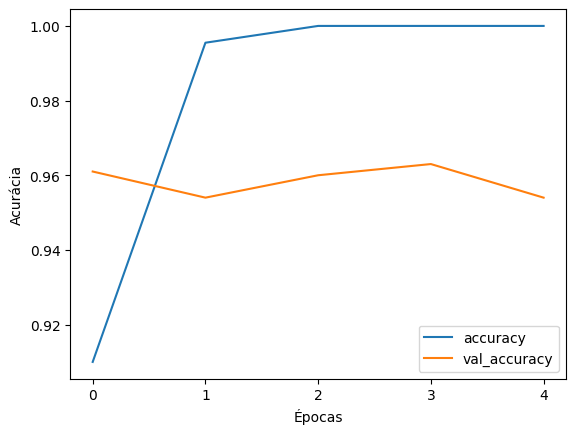

In [112]:
# acurácia
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

In [113]:
# Avaliação do Modelo
val_loss, val_accuracy = model.evaluate(test_generator)
print(val_accuracy)

8/8 [==============================] - 5s 509ms/step - loss: 0.1810 - accuracy: 0.9540
0.9539999961853027


### 12)	**Seção 06 - GAN:** Gerador de dígitos fake

Importação das Bibliotecas e Carga do Modelo

In [114]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-0xtsd85g
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-0xtsd85g
  Resolved https://github.com/tensorflow/docs to commit abfbe6e54864baa38dbb985b984acd304be610d4
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183273 sha256=290c12b31ba406d3357fa612d2f858453269a4d84adf5cf7d77ae175209cbdc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-vrxbe5nv/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


carregar dados e pré-processar

In [116]:
# Carga, pré-processamento e separação
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

 Criar e testar gerador

In [117]:
#criação
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 28, 28, 1)
  return model

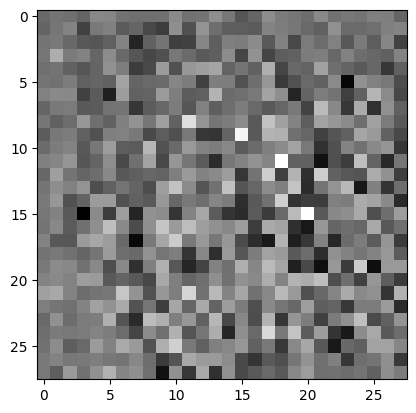

In [118]:
# teste de criação de uma imagem (sem treinar)
generator = make_generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

criar e testar o discriminador

In [119]:
# criação
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
  input_shape=[28, 28, 1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

In [120]:
# Teste do discriminador (não treinado)
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00056021]], shape=(1, 1), dtype=float32)


Função de perda e otimizador

In [121]:
#Função de perda Binary Cross Entropy
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Quantifica quão bom é o discriminador
# Compara: predições de imagens reais com vetor de 1's 
# Compara: predições de imagens fake com vetor de 0's
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

# Quantifica quão bem o gerador enganou o discriminador
# Se for bom, imagens fake serão classificadas com 1's
# Compara: predições fake com 1's 
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output) 

# Otimizador do gerador e discriminador
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Salvar pontos de verificação

In [122]:
# Salvar pontos de verificação, caso a tarefa seja interrompida
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, 
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,discriminator=discriminator)

Loop de treinamento

In [123]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
  
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    for image_batch in dataset:
      train_step(image_batch)
    # Produz as imagens para o GIF
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch + 1, seed)
    # Salva a cada 15 épocas
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Gera depois da época final
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

 Geração das imagens

In [124]:
# Gerar e salvar imagens
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

Treino do modelo

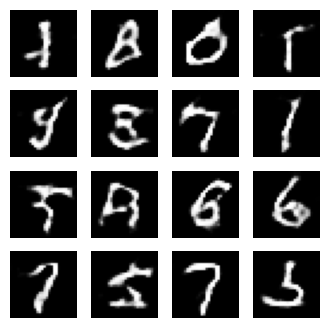

In [125]:
# Treinar o modelo
train(train_dataset, EPOCHS)
# restaurar o último ponto de verificação
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Gerar e mostrar o GIF animado

<ipython-input-126-2bb8b1f3482f>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-126-2bb8b1f3482f>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



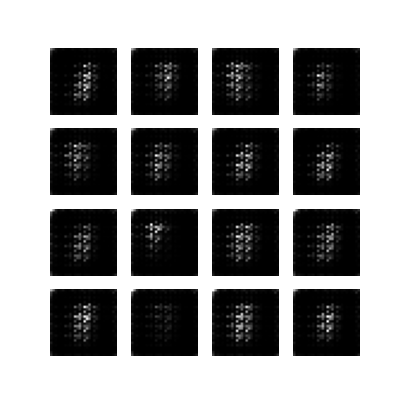

In [126]:
# Mostra uma imagem conforme a época
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)
# Gera e mostra o GIF
anim_file = 'dcgan.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

### 13)	**Seção 07 - Sistema de Recomendação - Filmes:** Sistema de recomendação

Importação das Bibliotecas e Carga do Modelo

In [127]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

!wget -nc http://www.razer.net.br/datasets/ml-20m.zip
!unzip -n ml-20m.zip

df = pd.read_csv("ml-20m/ratings.csv")
df.head()

--2023-05-01 21:30:11--  http://www.razer.net.br/datasets/ml-20m.zip
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  40.0MB/s    in 3.9s    

2023-05-01 21:30:15 (49.1 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


Separação da Base

In [ ]:
!wget -nc http://www.razer.net.br/datasets/ml-20m.zip
!unzip -n ml-20m.zip

df = pd.read_csv("ml-20m/ratings.csv")
df.head()

In [128]:
# userId e movieId não estão no formato certo para usar 
# Embeddings, devem ser categóricos
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes

df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

N = len(set(user_ids))
M = len(set(movie_ids))

# dimensão do embedding (tentar outros)
K = 10

Criação do Modelo

In [129]:
# usuário
u = Input(shape=(1,))
u_emb = Embedding(N, K)(u) # saída : num_samples, 1, K
u_emb = Flatten()(u_emb)   # saída : num_samples, K

# filme
m = Input(shape=(1,))
m_emb = Embedding(M, K)(m)  # saída : num_samples, 1, K
m_emb = Flatten()(m_emb)    # saída : num_samples, K

x = Concatenate()([u_emb, m_emb])

x = Dense(1024, activation="relu")(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)

Compilação, pré-processamento e Treino do Modelo

In [130]:
# compilação
model.compile(
    loss="mse",
    optimizer=SGD(learning_rate=0.08, momentum=0.9)
)

In [131]:
# separação de dados e pré-processamento
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)

Ntrain = int(0.8 * len(ratings)) # separar os dados 80% x 20%

train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]
test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

# centralizar as notas
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [132]:
# treinamento
epochs = 25
r = model.fit(
    x=[train_user, train_movie],
    y=train_ratings,
    epochs=epochs,
    batch_size=1024,
    verbose=2, # não imprime o progresso
    validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 90s - loss: 0.7660 - val_loss: 0.7165 - 90s/epoch - 6ms/step
Epoch 2/25
15626/15626 - 66s - loss: 0.6996 - val_loss: 0.7083 - 66s/epoch - 4ms/step
Epoch 3/25
15626/15626 - 67s - loss: 0.6773 - val_loss: 0.6825 - 67s/epoch - 4ms/step
Epoch 4/25
15626/15626 - 74s - loss: 0.6629 - val_loss: 0.6832 - 74s/epoch - 5ms/step
Epoch 5/25
15626/15626 - 65s - loss: 0.6519 - val_loss: 0.6667 - 65s/epoch - 4ms/step
Epoch 6/25
15626/15626 - 67s - loss: 0.6393 - val_loss: 0.6594 - 67s/epoch - 4ms/step
Epoch 7/25
15626/15626 - 66s - loss: 0.6235 - val_loss: 0.6496 - 66s/epoch - 4ms/step
Epoch 8/25
15626/15626 - 63s - loss: 0.6102 - val_loss: 0.6431 - 63s/epoch - 4ms/step
Epoch 9/25
15626/15626 - 65s - loss: 0.6010 - val_loss: 0.6568 - 65s/epoch - 4ms/step
Epoch 10/25
15626/15626 - 63s - loss: 0.5932 - val_loss: 0.6363 - 63s/epoch - 4ms/step
Epoch 11/25
15626/15626 - 64s - loss: 0.5850 - val_loss: 0.6341 - 64s/epoch - 4ms/step
Epoch 12/25
15626/15626 - 65s - loss: 0.5763 - val_l

Avaliação do Modelo


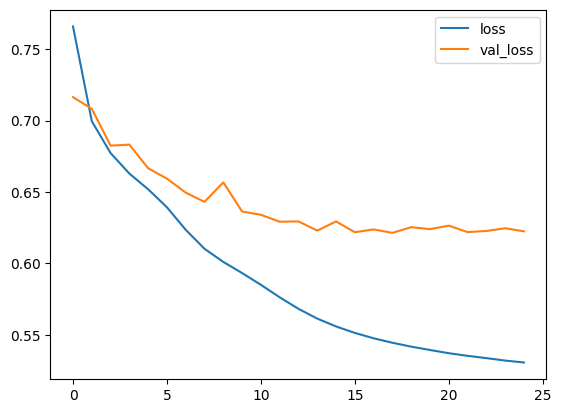

In [133]:
# Função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

Resultados

In [134]:
# Recomendações para o usuário 73023

# Gerar o array com o usuário único
# repete a quantidade de filmes
input_usuario = np.repeat(a=73023, repeats=M) 
film = np.array(list(set(movie_ids)))

preds = model.predict( [input_usuario, film] )

# descentraliza as predições
rat = preds.flatten() + avg_rating

# índice da maior nota
idx = np.argmax(rat)

print("Recomendação: Filme - ", film[idx], " / ", rat[idx] , "*")

836/836 [==============================] - 2s 2ms/step
Recomendação: Filme -  315  /  4.162995 *
